This notebook contains exploratory data analysis and preprocessing for the MIT ADSP socio-economic geographic dataset

Performed here:
- Explore dataset sizes, structures, features, null/duplicate values, summary statistics
- Perform univariate and bivariate analysis / visualization
- Scale the data

In [1]:
# Import libraries
import itertools
import warnings
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PowerTransformer, QuantileTransformer

In [2]:
# Set viewing preferences
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
mpl.rcParams["figure.max_open_warning"] = 50
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Load data
data_orig = pd.read_csv("../data/data_orig.csv")
data = data_orig.copy()

# Exploratory Data Analysis

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [6]:
data.shape

(167, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# Check for duplicate values
data.duplicated().values.any()

False

**Data Summary**

In [9]:
# Numerical data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**Numerical Univariate Analysis**

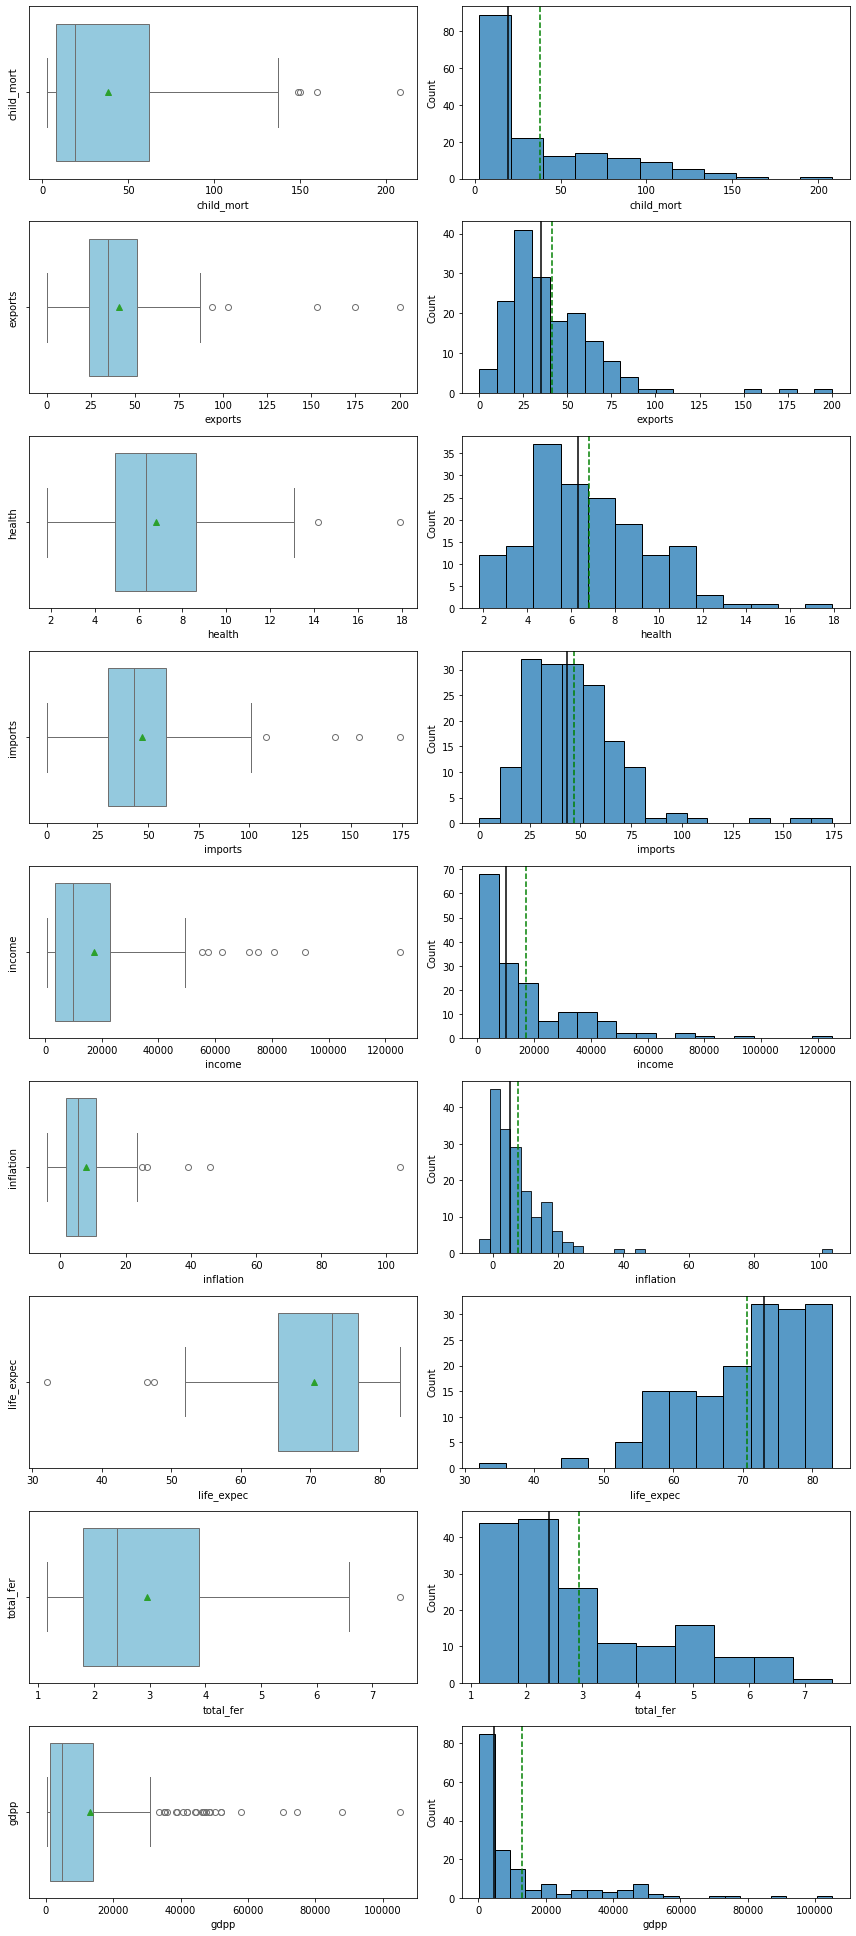

In [10]:
# Show distribution of numerical data 
features = data.select_dtypes(include="number").columns
nrows = len(features)
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows*3))
if nrows == 1:
    ax = [ax]
for i, col in enumerate(features):
    sns.boxplot(data=data, x=col, ax=ax[i][0], showmeans=True, color="skyblue")
    sns.histplot(data=data, x=col, kde=False, ax=ax[i][1], palette="Blues")
    ax[i][1].axvline(data[col].mean(), color="green", linestyle="--")
    ax[i][1].axvline(data[col].median(), color="black", linestyle="-")
    ax[i][0].set_ylabel(col)
fig.tight_layout()
plt.show()

**Numerical Bivariate Analysis**

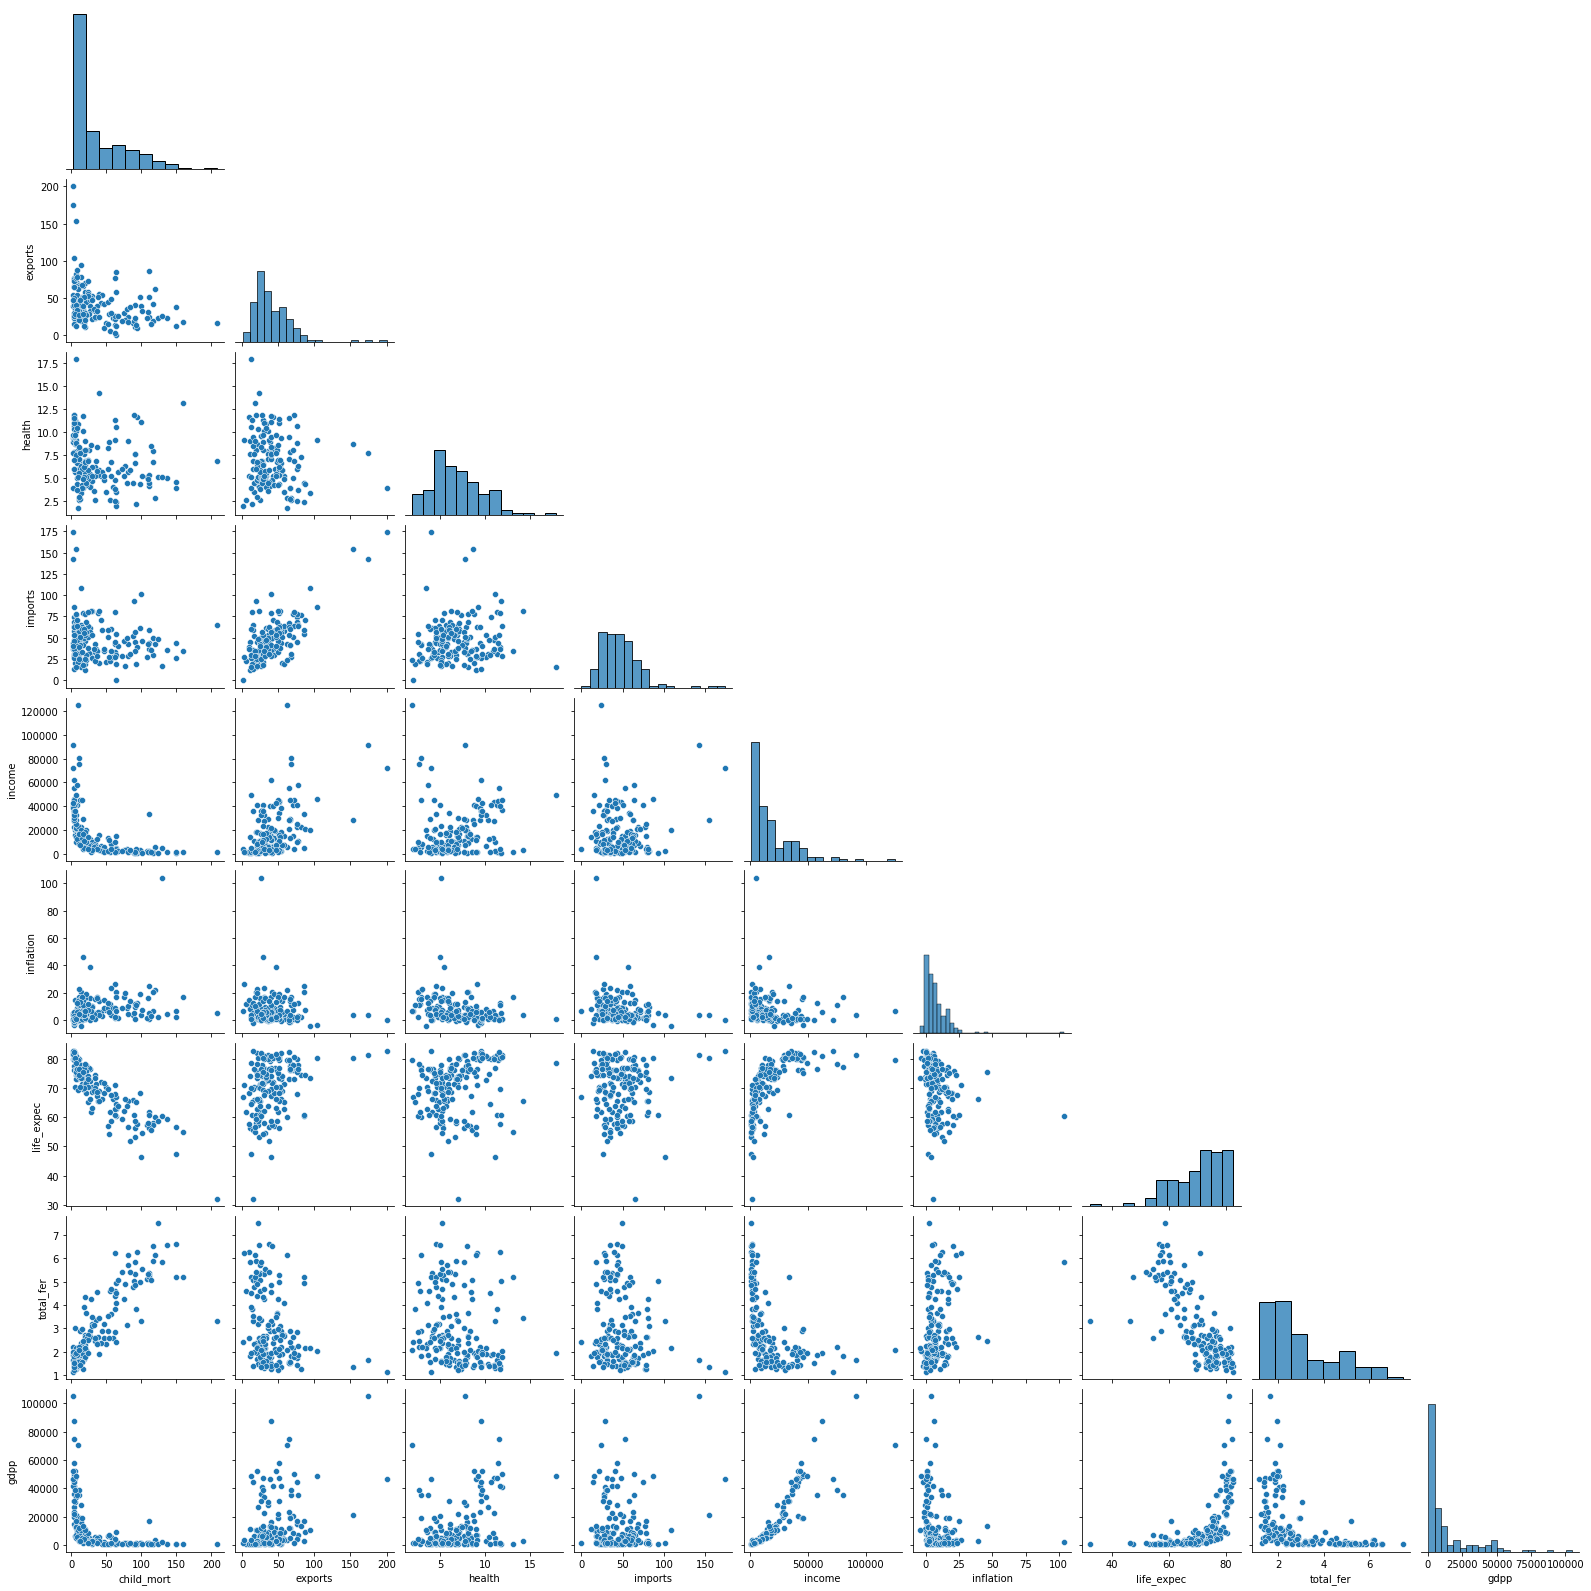

In [11]:
# Show pairplot
sns.pairplot(data, corner=True)
plt.show()

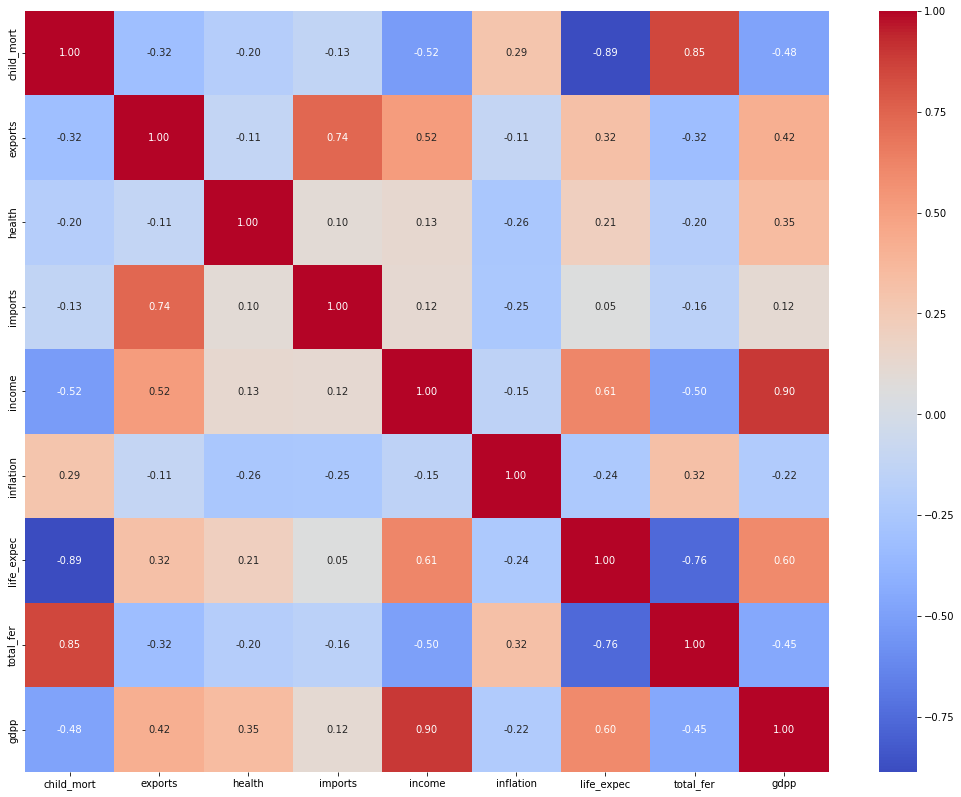

In [12]:
# Show heatmap of numerical feature correlations
num_corr = data.select_dtypes(include="number").corr()
fig, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(num_corr, cmap="coolwarm", annot=True, fmt=".2f", ax=ax)
plt.show()

# Data Scaling

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
# Drop Country
data = data.drop(["country"], axis=1)

In [15]:
# Explore different options for scaling the data
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()
power_transformer = PowerTransformer()
quantile_transformer = QuantileTransformer()

In [16]:
# Scale the data
data_std = pd.DataFrame(std_scaler.fit_transform(data), columns = data.columns)
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data), columns = data.columns)
data_robust = pd.DataFrame(robust_scaler.fit_transform(data), columns = data.columns)
data_norm = pd.DataFrame(normalizer.fit_transform(data), columns = data.columns)
data_power = pd.DataFrame(power_transformer.fit_transform(data), columns = data.columns)
data_quantile = pd.DataFrame(quantile_transformer.fit_transform(data), columns = data.columns)

In [17]:
# Save the scaled datasets
data_std.to_csv("../data/data_std.csv", index=False)
data_minmax.to_csv("../data/data_minmax.csv", index=False)
data_robust.to_csv("../data/data_robust.csv", index=False)
data_norm.to_csv("../data/data_norm.csv", index=False)
data_power.to_csv("../data/data_power.csv", index=False)
data_quantile.to_csv("../data/data_quantile.csv", index=False)